In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaPC_metGBA.csv')

In [2]:
#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [3]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Ajustar el modelo de Regresion Lineal multiple
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = regression.predict(X_test)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

scores = cross_val_score(regression, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.64136274 0.56406904 0.64228424 0.52149735 0.61353442]
Media de cross_validation 0.5965495560878088
Metricas sobre la prediccion
R^2: 0.6330458735087783
MSE: 51.396475430308904
RMSE: 7.169133520189794


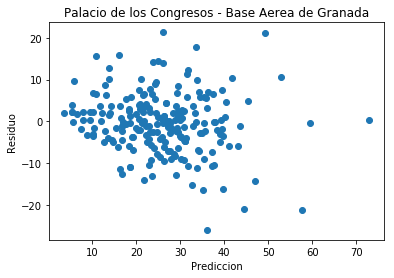

In [20]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Palacio de los Congresos - Base Aerea de Granada')
plt.show()

In [8]:
#Iniciamos la contruccuion optimo del modelo con eliminacion hacia atras

In [9]:
#Construccion del modelo optimo con la eliminacion hacia atras
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
SL = 0.05

In [17]:
X_opt = X[:,[0,1,3,4,5,6,8,11,12]]
regression_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     225.5
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          3.77e-223
Time:                        17:03:06   Log-Likelihood:                -3751.4
No. Observations:                1075   AIC:                             7521.
Df Residuals:                    1066   BIC:                             7566.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.6848     51.537     -1.701      0.089    -188.809      13.440
x1             0.5320      0.050     10.645      0.000       0.434       0.630
x2             0.0123      0.009      1.334      0.182      -0.006       0.030
x3             0.1411      0.061      2.300      0.022       0.021       0.261
x4            -0.0837      0.048     -1.748      0.081      -0.178       0.010
x5            -0.2187      0.068     -3.225      0.001      -0.352      -0.086
x6             0.0976      0.055      1.769      0.077      -0.011       0.206
x7             0.8625      0.155      5.548      0.000       0.557       1.168
x8            -0.7429      0.179     -4.144      0.000      -1.095      -0.391
==============================================================================
Omnibus:                      200.508   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.286
Skew:                           0.854   Prob(JB):                    3.61e-165
Kurtosis:                       6.740   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
regression_opt = LinearRegression()
regression_opt.fit(X_train[:,[0,2,3,4,5,7,10,11]],y_train)
y_pred_opt = regression_opt.predict(X_test[:,[0,2,3,4,5,7,10,11]])

#resultado_opt = evaluate(regression_opt, X_test[:,[0,2,3,4,5,7,10,11]], y_test)
#score_opt = regression_opt.score(X_train[:,[0,2,3,4,5,7,10,11]],y_train)
print('Metricas sobre la prediccion Modificada')
print('R^2:',r2_score(y_test, y_pred_opt))
print('MSE:',mean_squared_error(y_test, y_pred_opt))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred_opt)))

Metricas sobre la prediccion Modificada
R^2: 0.6391875280776393
MSE: 50.536260555037664
RMSE: 7.1088860277147266


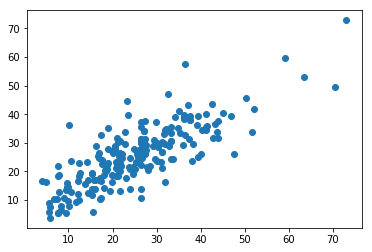

In [19]:
from matplotlib import pyplot as plt
y_pred = regression.predict(X_test)
plt.scatter(y_test, y_pred)